# Credible Threats - Life of Py(thon)
By The Good, The Bad and the Ugly aka. The Three Musketeers. 

Welcome to the amazing Credible Threats dataproject Jupyter Notebook. 

This notebook is *our precious*, it is *the stuff that dreams are made of*. It dives into the wonderful world of movies, and we *just keep swimming*, because *where we're going we don't need roads*. 

What is a movie??? A movie is *poetry, beauty, romance, love. These are what we stay alive for*. They are stories of another world, portrayed in such a way, that though *there's no place like home*, the movies are a close second. And though movies are great, *mama always said the movies is like a box of chocolates. You never know what you're gonna get*, and she was right about that. Luckily for you, Credible Threats is at your aid. Through this dataproject, we will help you sort through the best and the worst of thousands of movies. How do we do that you might ask, well it is *elementary, dear Watson*. *We're going to have to science the shit out of this*.

Now, we know what you're thinking, *with great power comes great responsiblity*, but don't worry, *we're wizards, Harry*. In the following, we will look at IMDB data, containing over 14,000 movies, from the 1920's Metropolis to the 2010's Toy Story 3. You might say that we go *to infinity and beyond* in the world of movies.

Giving you access to this *supercalifragilisticexpialidocious* notebook, we're *making you and offer you can't refuse*, as the notebook contains summary statistics by decade, interactive histograms of ratings, and even rainbow colored graphs which will leave thinking, *I am Groot*. 

Hopefully, you won't have to stop along the way and say, *Houston, we have a problem*. 
So, *fasten your seatbelts. It's going to be a bumpy ride*. 


![ChessUrl](https://media.giphy.com/media/145hX7QVWqyili/giphy.gif "Here we go")

## Datalicious

### Importing Data

In [18]:
# Importing packages
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
import numpy as np
from ipywidgets import Layout
import seaborn as sns
import math
import requests
from bs4 import BeautifulSoup as bs
import pyprind   ## Install by: "conda install -c conda-forge pyprind" or "pip install pyprind"
sns.set()

In [20]:
## Importing and cleaning the data 

filename = 'imdb.csv'

## Defining the function to import and clean the data
def gen_df(filename):
        """ Returns a pandas dataframe containing information about movies from the IMDB database 

        Args:
        filename (csv-file): The csv-file have to be the file imdb.csv

        Returns:
        A pandas dataframe

        Notice:
        The function will not work if other files than imdb.csv are used as input """
        
    # Get .csv.file
    data = pd.read_csv(filename, sep=';', encoding='latin-1', escapechar='\\')

    # Read file into pandas dataframe
    df = pd.DataFrame(data)

    # Drop unwanted columns
    for i in range(44,48):
        df.drop(columns=[f'Unnamed: {i}'], inplace=True)
    df.drop(columns=['fn','wordsInTitle','url'], inplace=True)

    # Keep only observations of 'movie'-type
    I = df['type'] == 'video.movie'
    df = df.loc[I]
    df.drop(columns=['type'], inplace=True)

    # Drop movies with missing observations
    df.dropna(inplace=True)

    # During the importing process, the first decimal has become 0 for all movies.
    # Thus, we replace "0"'s to ""
    df['imdbRating'] = df['imdbRating'].astype(str)
    df['imdbRating'].replace(regex=True, inplace=True,to_replace='0',value='')
    df['imdbRating'] = df['imdbRating'].astype(float)

    # Transform duration from seconds to hours
    df['duration'] = df['duration']/60**2

    # Drop years before 1920 and the year 2014 because of few obervations
    I = (df['year']>=1920) & (df['year']<=2013)
    df = df.loc[I]

    # Change the type of 'year' to integer
    df['year'] = df['year'].astype(int)    
    
    # Sort observations and reset index
    df.sort_values('year', inplace=True)
    df.reset_index(inplace=True)

    # Generating variable that shows the decade (as a string)
    year_list = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]

    df['decade'] = ''
    for i,start in enumerate(year_list):
        end = start+10
        df.loc[(df['year'] >= start) & (df['year'] < end), 'decade'] = f'{year_list[i]}s'

    return df

df = gen_df(filename)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 19)

### Descriptive Data

 In the following we generate summary statistics of year, ratings, duration, and number of ratings and wins. These are turned into an interactive tabel, where the viewer can choose to watch the statistics for the entire sample period, or for a given decade. 

In [25]:
# Summary Statistics by Decade  
decade = ["all", "1920s", "1930s", "1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s"]

def summ_stat(decade):
    """ Generates a Summary Statistics Table 
    
    Args: 
        decade (string): Decade for which the summary statistics are generated. 
                         These must be written in the format, "[decade]s", e.g. "1920s".
        
    Returns: 
        One table for each element in decade. 
        
    Notice: The function is generated so that it can be called in the function summ_stat_interactive. Thus, it is not intended to be used on its own. 
    
    """
    
    
    pd.options.display.float_format = "{:.2f}".format
    if decade == "all": 
        return df[["year", "imdbRating", "duration", "nrOfWins", "nrOfNominations"]].describe() 
    else: 
        df_decade = df.loc[df["decade"] == decade]
        return df_decade[["year", "imdbRating", "duration", "nrOfWins", "nrOfNominations"]].describe() 
    

def summ_stat_interactive(): 
    
    """ Generates a interactive Summary Statistics Table, using the function summ_stat. """
    
    
    widgets.interact(summ_stat, 
    
    # Decade Dropdown 
    decade = widgets.Dropdown(
    decription="Decade", 
    options=decade, 
    value="all"));

summ_stat_interactive()


interactive(children=(Dropdown(description='decade', options=('all', '1920s', '1930s', '1940s', '1950s', '1960…

In [26]:
# Defining function that rounds up to next hundred 
def roundup(x):
    """ Returns an integer which is perfectly divided by 100

        Args: 
            x (float): The number to round up to next hundred

        Returns: 
            A number (integer) """
    
    return int(math.ceil(x / 100.0)) * 100

## Defining a figure which plot the total numbers of movies per year or decade
def fig3_J():
    """ Generates a figure which plots the total number of movies per decade or year
    
    Args: 
        No arguments are needed.
        
    Returns: 
        An interactive plot  
        
    Notice: 
        It will raise an error if the function are given an argument!
    """
    
    ## Copiyng the dataframe to a new dataframe
    imdb = df.copy()
    
    ## Generating list for future use
    time_var = ['year', 'decade']
    decades = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
    
    ## Defining function that plot the total numbers of movies per year or decade
    def fig(time_var):   
        """ Generates a figure which plots the total number of movies per decade or year
        
        Args: 
            time_var (string): Should be either 'year' or 'decade' depending on if the 
            number of movies should be grouped by on year or decade. 
           
        Returns: 
            An interactive plot.  

        Notice: 
            The function is generated so that it can be called using widgets.interact. 
            Thus, it is not intended to be used on its own. 
            """
        
        # Generate variable that counts number of observation/movies in each year/decade
        imdb['temp']=1
        imdb['tot_film'] = imdb.groupby(time_var)['temp'].transform(lambda x : x.sum())
        del imdb['temp']

        # Make new dataframe that only take one value per year/decade. 
        # The dataframe only contain the year/decade indicator and number of movies in the given year/decade
        y = pd.DataFrame(imdb.groupby(time_var)['tot_film'].first())
        y.reset_index(inplace=True)

        # Setting max value of y-axis to next hundred of max number of movies
        temp = imdb['tot_film'].max()
        y_max = roundup(temp)

        # Plotting the number of movies per year
        fig = plt.figure(figsize=(7,6))
        ax1 = fig.add_subplot(1,1,1)

        # Set different bar-width depending on the plot is movies per year or decade
        if time_var == 'year':
            ax1.bar(y[time_var], y['tot_film'], width=0.55)
        else:
            ax1.bar(y[time_var], y['tot_film'])

        ax1.set_ylabel('Numbers of movies')
        ax1.set_title(f'Figure 1: Numbers of movies, 1920-2013')
        ax1.set_ylim([0,y_max])

        # Set the ticks on the x-axis to be every 10th year (if the plots is movies per year)
        if time_var == 'year':            
            ax1.set_xticks(decades)
            
    ## Making the figure interactive so it is optionally to plot the number of movies per year or decade (year is default)
    widgets.interact(fig,
        time_var = widgets.Dropdown(description='Time unit', value='year', options=time_var, 
                    layout=Layout(width='175px')),
    );    

fig3_J()

interactive(children=(Dropdown(description='Time unit', layout=Layout(width='175px'), options=('year', 'decade…

The number of movies per year/decade has not surprisingly increased a lot since 1920, cf. figure 1. In the 2000s over 3300 movies were produced. This is 22 times more movies than in the 1920s where only 150 movies were produced. The reason to the relatively low numbers of movies in the 2010s (use 'decade' as time unit) is partly because we only have movies from the first 4 years of the decade. However, the number of movies per year also decrease compared to the last half of the 2000s. As noted earlier, we are not sure how representative our data is. Consequently, the lower number of movies per year in the 2010s could be due imprecise data.

## Staring into the Eyes of Genres

### Number of Movies in Each Genre

Here, we summarize each genre varible. Since each of these are dummies, the sum will equal the number of movies in each genre. These sums are then printed through a loop, so the output is a list of genres and the number of movies in each genre.  

In [27]:
# Generating genre list
genre = list(df)[13:41]

# Counting movies in each genre
for i in genre: 
    sum = df[i].sum(axis=0)
    print(f'Number of {i} movies: {sum:.0f}')

Number of Action movies: 1772
Number of Adult movies: 16
Number of Adventure movies: 1456
Number of Animation movies: 534
Number of Biography movies: 541
Number of Comedy movies: 3327
Number of Crime movies: 1638
Number of Documentary movies: 778
Number of Drama movies: 5109
Number of Family movies: 685
Number of Fantasy movies: 679
Number of FilmNoir movies: 190
Number of GameShow movies: 2
Number of History movies: 460
Number of Horror movies: 935
Number of Music movies: 269
Number of Musical movies: 332
Number of Mystery movies: 750
Number of News movies: 2
Number of RealityTV movies: 2
Number of Romance movies: 1707
Number of SciFi movies: 731
Number of Short movies: 380
Number of Sport movies: 205
Number of TalkShow movies: 3
Number of Thriller movies: 1235
Number of War movies: 442
Number of Western movies: 292


### Share of movies pr. genre

In [6]:
# Generate genre list
genre_list = list(df)[13:41]

def genre_share_fig():
    """ Returns a figure, which calculates the share of movies in the chosen genre. The share
        can be calculated by either year or decade"""

    def _plot_1(df,genre,timevar):
        """ Calculates the share of movies in each genre chosen, by the timevariable chose, i.e. year or decade.
        
            Args:
                df (DataFrame): Which dataframe is being used to do the calculation.
                genre (str): Which genres the shares are calculated for. 
                timevar (str): Which timevariable are the shares calculated over? Can be year or decade
            
            Returns:
                A line plot for all genres chosen.
            
            Notice:
                Does not show plot by itself, but has to be activated through another function, e.g. widgets.interact"""

        df['count'] = 1
        df['movies_year'] = df.groupby(timevar)['count'].transform(lambda x: x.sum())  

        # Plot year sum of different genres
        for i in genre:
        
            # Calculate sum of movies by timevariable, and share of movies within time that is of a certain genre
            df[f'{i}_time'] = df.groupby(timevar)[i].transform(lambda x: x.sum())
            df[f'{i} share'] = df[f'{i}_time']/df['movies_year']

            # Take first element of each timevariable group
            y_share = df.groupby(timevar)[f'{i} share'].first()

            # Plot the first elements
            plt.plot(y_share)

            # Add labels and title
            plt.xlabel(timevar)
            plt.ylabel('Share of movies')
            if len(genre) == 1:
                plt.title(f'Figure 2: Movies by genre: {i}')
            elif len(genre) > 1:
                plt.legend(loc='upper left')
                plt.title(f'Figure 2: Movies by genres')

    def plot_1(df):
        """ Interaction function which interacts with _plot_1. The function activates two widgets,
            for choosing genres and timevariable for _plot_1."""

        widgets.interact(_plot_1,
                        df = widgets.fixed(df),
                        genre = widgets.SelectMultiple(
                            options = genre_list,
                            description = 'Genres',
                            value = ['Drama', 'Comedy', 'Action'],
                            disabled = False),
                        timevar = widgets.Dropdown(
                        options = ['year', 'decade'],
                        description = 'Timevariable',
                        value = 'decade',
                        disabled = False))

    plot_1(df)

genre_share_fig()

interactive(children=(SelectMultiple(description='Genres', index=(8, 5, 0), options=('Action', 'Adult', 'Adven…

Figure 2 shows the share of movies in a certain year or decade, which is by a selected genre. In the list above, we see that drama-, comedy-, and actionmovies are the three largest genres, measured by total movies in the dataset. Looking at the evolvement their shares, we see that the share of dramamovies has fallen almost steadily since the 1920's. The share of comedy movies is the same in the 2010's as in the 1920's, but had a relatively low share from the 1940's to the 1970's. The share of actionmovies has increased quite steadily since the 1920's.

Another interesting observation is the evolvement of westernmovies, which were popular from around the 1950's to 1970's but since then have had quite a low share of the total movies.

Looking at war movies, we see a large increase in the share of movies around the 1940's, i.e. around World War II. Through the following Cold War, war movies held a rleatively large though decreasing share of movies. In the 2010's they hold a relatively low share of movies.

### Correlation Between Genres

Each movie is categorized as a given genre. However, some movies are categorized as more than one genre, e.g. a given Disney movie might both be a categorized as a family movie and an animation. In the following, we generate a heat map, which shows the correlation between genres. Thus, a darker square in the heat map, indicates a higher correlation between two genres. 

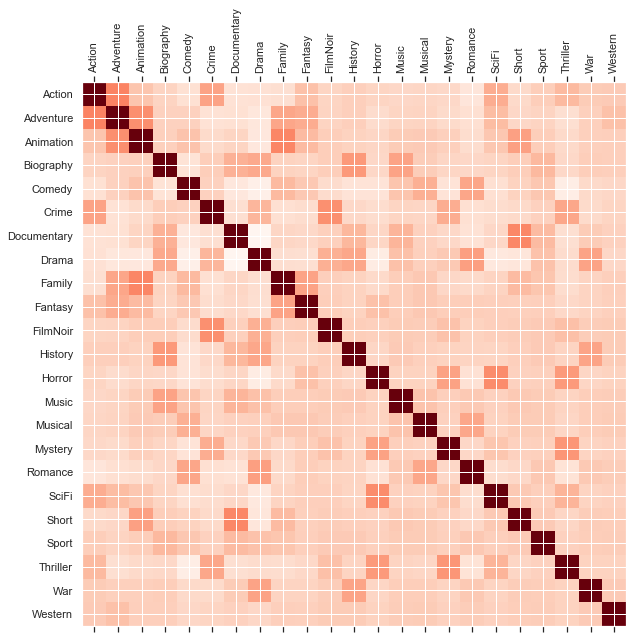

In [7]:
# New Genre List (Dropping Genres with less than 100 movies)
genre_new = ['Action', 'Adventure', 'Animation', 'Biography',
         'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
         'FilmNoir', 'History', 'Horror', 'Music', 'Musical',
         'Mystery', 'Romance', 'SciFi', 'Short', 'Sport', 'Thriller', 'War', 'Western']


# Heat map between genres
corr = df[genre_new].corr()
# print(corr)

fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr, cmap=plt.cm.Reds)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns);

From the heatmap, we see that the correlation between genres is not particularly explicit. Darker squares indicate higher correlation, and thus the diagonal is darkest, as all genres are perfectly correlated with themselves. Notable is it, that Drama and Documentary is hardly correlated at all, and thus we rarely see a Documentary which is also categorized as Drama. On the other hand, Documentaries are often Shorts as well. 
We see that Adventure is relatively highly correlated with Action and Animation, while Action and Animation are as highly correlated. Also, as expected, Animation and Family are highly correlated, which is probably thanks to Disney. 

## Rated PG 13 - Parents Strongly Cautioned

### Histogram of Number of Movies pr. Rating

This generates an interactive histogram, which shows the number of ratings by genre. 

In [8]:
# Interactive Histogram
def histogram(variable, genre, bins_num):
    """ Generates histogram of variable per genre
    
    Args: 
        variable (string): Variable on the vertical axis
        genre (string): Only movies of this genre is considered
        bins_num (int): Number of bins in the histogram
    
    Notice: 
        Remember quotationmarks around variable 
        bins_num must be an integer, and does not accept floats
    
    """
    
    df_hist = df.loc[df[genre] == 1]
    plt.hist(df_hist[variable], bins=bins_num)
    
    # Labels
    plt.title("Figure 4: Number of Movies pr. Rating")
    plt.xlabel("Rating")
    plt.xticks(range(1,11))
    
# histogram("imdbRating", "Comedy", 10)   # Remember quote marks around variable names. 


def hist_interactive(variable="imdbRating"): 
    """ Generate interactive histogram of variable by genre
    
    Args: 
        variable (string): Variable on the vertical axis.
        
    Default variable = "imdbRating"
    
    """
    
    
    widgets.interact(histogram, 
    variable = widgets.fixed(variable), 
    
    # Genre Dropdown
    genre = widgets.Dropdown(
    description="Genre", 
    options=genre_new, 
    value="Comedy"),
    
    # Bins slider 
    bins_num=widgets.IntSlider(
    value=10,
    description="Bins", 
    min=10,
    max=50, 
    step=1,
    disabled=False,
    continuous_update=False)
    ); 

hist_interactive()

interactive(children=(Dropdown(description='Genre', index=4, options=('Action', 'Adventure', 'Animation', 'Bio…

This histogram show us that most genre ratings are centered around 7 or 8, and slightly scewed to the left. Genres with a lot of movies typically have a wider distribution, and thus more low-rated movies.  

### Ratings over time

In [14]:
## Defining function which plots the average IMDB rating per year or decade
def fig2_J():
    """ Generates a figure which plots the average IMDB rating (in levels and normalized) per year or decade
    
    Args: 
        No arguments are needed.
        
    Returns: 
        Two interactive plots
        
    Notice: 
        It will raise an error if the function are given an argument!
    """    
    
    ## Copiyng the dataframe to a new dataframe
    imdb = df.copy()
    
    ## Generating list for future use
    time_var = ['year', 'decade']
    years = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
    
    
    ## Defining function that plots the average IMDB rating (in levels and normalized) per year or decade
    def fig(time_var):    
        """ Generates a figure which plots the average IMDB 
        rating (in levels and normalized) per year or decade
        
        Args: 
            time_var (string): Should be either 'year' or 'decade' depending on if the 
            average ratings should be grouped by on year or decade. 
           
        Returns: 
            Two interactive plot.  

        Notice: 
            The function is generated so that it can be called using widgets.interact. 
            Thus, it is not intended to be used on its own. 
            """        
        # Creating variable that takes the average IMDB rating per year/decade
        imdb['avg_rat'] = imdb.groupby(time_var)['imdbRating'].transform(lambda x : x.mean())
        imdb['avg_rat_index'] = imdb['avg_rat'].transform(lambda x : x/x[0]*100)
        
        # Make two new dataframes that only take one value per year/decade. 
        # The dataframes only contain the year/decade indicator and average rating or normalized ratings per year/decade
        y = pd.DataFrame(imdb.groupby(time_var)['avg_rat'].first())
        y.reset_index(inplace=True)
        
        x = pd.DataFrame(imdb.groupby(time_var)['avg_rat_index'].first())
        x.reset_index(inplace=True)

        # Plotting the figures
        fig = plt.figure(figsize=(13,6))
        
        # 1st Figure (ratings in level)
        ax1 = fig.add_subplot(1,2,1)
        ax1.plot(y[time_var], y['avg_rat'])
        ax1.set_ylabel('Average rating')
        ax1.set_title(f'Figure 5: Average IMDB rating, 1920-2013')
        ax1.set_ylim([0,10])

        #2nd Figure (normalized ratings)
        ax2 = fig.add_subplot(1,2,2)
        ax2.plot(x[time_var], x['avg_rat_index'])
        if time_var == 'year':
            ax2.set_ylabel(f'Index: 1920=100')
        else:
            ax2.set_ylabel(f'Index: 1920s=100')
        ax2.set_title(f'Figure 6: Normalized average of IMDB rating, 1920-2013')
        ax2.set_ylim([80,105])
        
        # Set the ticks on the x-axis to be every 10th year (if the plots are movies per year)
        if time_var == 'year':            
            ax1.set_xticks(years)            
            ax2.set_xticks(years)
            
    ## Making the figure interactive so it is optionally to plot the ratings per year or decade (year is default)                    
    widgets.interact(fig,
        time_var = widgets.Dropdown(description='Time unit', value='year', options=time_var, 
                    layout=Layout(width='175px')),
    );    

fig2_J()

interactive(children=(Dropdown(description='Time unit', layout=Layout(width='175px'), options=('year', 'decade…

Since the beginning of our dataset in 1920, the ratings have been trending downwards. From the 1920s to the 2010s, the average rating have decreased by one rating point which is 12-13 percentage points lower, cf figure 5 and 6. The average ratings have decreased in allmost all decades (use 'decade' as time unit), but the ratings have been quite volatile on a year-to-year basis.

The following figures try to come with some explanations to why the ratings have been decreasing. 

### Do good movies have better ratings?

In [15]:
## Defining a function which plots the distribution of the IMDB rating conditioned on award wins
def fig1_J():
    """ Generates a figure which plots the distribution of the IMDB rating conditioned on award wins
    
    Args: 
        No arguments are needed.
        
    Returns: 
        An interactive plots
        
    Notice: 
        It will raise an error if the function are given an argument!
    """   
    
    ## Copiyng the dataframe to a new dataframe
    imdb = df.copy()
    
    ## Creating variable that groups number of wins and a list with the intervals
    imdb['nrw'] = 0
    imdb.loc[(imdb['nrOfWins'] > 0) & (imdb['nrOfWins'] < 10), ['nrw']] = 1
    imdb.loc[(imdb['nrOfWins'] >= 10) & (imdb['nrOfWins'] < 20), ['nrw']] = 2
    imdb.loc[(imdb['nrOfWins'] >= 20) & (imdb['nrOfWins'] < 30), ['nrw']] = 3
    imdb.loc[(imdb['nrOfWins'] >= 30) & (imdb['nrOfWins'] < 40), ['nrw']] = 4
    imdb.loc[(imdb['nrOfWins'] >= 40), ['nrw']] = 5
    
    nrwins = ['0', '1-10', '11-20', '21-30', '31-40', '+40']

    
    ## Defining a function to plot the distribution of the IMDB rating condition on award wins
    def fig(win_0, win_110, win_1120, win_2130, win_3140, win_40):
        """ Generates a figure which plots which plots the 
        distribution of the IMDB rating conditioned on award wins
        
        Args: 
            win_0: Specifies whether to plot the distribution of ratings for movies with 0 wins 
            win_110: Specifies whether to plot the distribution of ratings for movies with 1-10 wins 
            win_1120: Specifies whether to plot the distribution of ratings for movies with 11-20 wins 
            win_2130: Specifies whether to plot the distribution of ratings for movies with 21-30 wins 
            win_3140: Specifies whether to plot the distribution of ratings for movies with 31-40 wins 
            win_40: Specifies whether to plot the distribution of ratings for movies with +40 wins 
           
        Returns: 
            An interactive plot.  

        Notice: 
            The function is generated so that it can be called using widgets.interact. 
            Thus, it is not intended to be used on its own. 
            """         
        
        # Make lists to plot the win categories and give them colors
        wins = [win_0, win_110, win_1120, win_2130, win_3140, win_40]
        color = ['red', 'orange', 'yellow', 'lime', 'blue', 'purple']
        
        # Loop over win category to plot the distribution of their ratings
        for i,val in enumerate(nrwins):
            nrwins_i = imdb.loc[(imdb['nrw'] == i)]
            if wins[i] == True:  # Only plot distribution if box is 'checked'
                sns.distplot(nrwins_i['imdbRating'], hist = False, kde = True,
                         kde_kws = {'linewidth': 2}, label = val, color=color[i]
                     )
        
        # Legends and labels        
        plt.legend(loc='upper left')
        plt.title('Figure 7: IMDB rating conditioned on numbers of award wins')
        plt.xlabel('IMDB rating')
        plt.ylabel('Density')
    
    # Making the figure interactive so it is optinally which wins categories to plot
    widgets.interact(fig,
        win_0=widgets.Checkbox(description=nrwins[0], value=True, disabled=False),
        win_110=widgets.Checkbox(description=nrwins[1], value=True, disabled=False),
        win_1120=widgets.Checkbox(description=nrwins[2], value=True, disabled=False),
        win_2130=widgets.Checkbox(description=nrwins[3], value=True, disabled=False),
        win_3140=widgets.Checkbox(description=nrwins[4], value=True, disabled=False),
        win_40=widgets.Checkbox(description=nrwins[5], value=True, disabled=False),
    );

fig1_J()

interactive(children=(Checkbox(value=True, description='0'), Checkbox(value=True, description='1-10'), Checkbo…

It will be natural to think that better movies have better ratings. One way to meassure the quality of a movie is to see how many awards the movie has won. This is of cause not a perfect meassurement, but can serve as a proxy. By looking at figure 7, the positive correlation between award wins and ratings is verified. Movies with many award wins have better ratings, and furthermore they have less variance in the ratings. However, one thing is important to stress: we cannot rule out problems with reverse causality and timing. Maybe the ratings depends on wins rather than the other way arround. This could be the case if people think a movie is better and thus rate it better if it has won several awards. Using our data we cannot test the causality because the data is cross sectional. Instead we need a kind of panel structure to check whether award wins increase the ratings. 

### Do we have a selection problem?

In [17]:
## Defining function that creates a plot of the total number of 
## movies and award wins per decade as well as the number of award wins 
## normalized by the total award win in the decade
def fig4_J():
      
    """ Generates a two figures: a plot of the average number of 
    award wins normalized by the total award wins in the decade and
    a plot of the total award wins and total numbers of movies per decade. 
    
    Args: 
        No arguments are needed.
        
    Returns: 
        Two plots. One of them are interactive.  
        
    Notice: 
        It will raise an error if you give the function an argument!
    """
    
    
    ## Copiyng the dataframe to a new dataframe
    imdb = df.copy()
    
    ## Making variable that shows total numbers of award win per decade
    imdb['nrOfWins_tot'] = imdb.groupby('decade')['nrOfWins'].transform(lambda x : x.sum())
    
    ## Generating variable that take a movies share of total win in the decade
    imdb['nrOfWins_share'] = imdb['nrOfWins']/imdb['nrOfWins_tot']*100
    
    ## Taking the mean/median/P75 on the win share in each decade
    imdb['nrOfWins_share_avg'] = imdb.groupby('decade')['nrOfWins_share'].transform(lambda x: x.mean())
    imdb['nrOfWins_share_med'] = imdb.groupby('decade')['nrOfWins_share'].transform(lambda x: x.median())
    imdb['nrOfWins_share_p75'] = imdb.groupby('decade')['nrOfWins_share'].transform(lambda x: np.percentile(x,75))


    ## Generate variable that counts number of observation/movies in each decade
    imdb['temp']=1
    imdb['tot_film'] = imdb.groupby('decade')['temp'].transform(lambda x : x.sum())
    del imdb['temp']

    ## Creating a new dataframe that have one observation per decade
    y = pd.DataFrame(imdb.groupby('decade')['nrOfWins_tot'].first())
    y['nrOfWins_share_avg'] = imdb.groupby('decade')['nrOfWins_share_avg'].first()
    y['nrOfWins_share_med'] = imdb.groupby('decade')['nrOfWins_share_med'].first()
    y['nrOfWins_share_p75'] = imdb.groupby('decade')['nrOfWins_share_p75'].first()
    y['tot_film'] = imdb.groupby('decade')['tot_film'].first()
    y.reset_index(inplace=True)

    ## Plotting the total numbers of wins and movies and the average share of wins per decade
    def fig(median, p75):
        
        """ Generates the two figures: a plot of the average number of 
        award wins normalized by the total award wins in the decade and
        a plot of the total award wins and total numbers of movies per decade. 

        Args: 
            median: median == True means that the median award win per decade 
            (normalized by the total award win in the decade) is depicted
            
            p75: p75 == True means that the 75th percentile of the award win per decade 
            (normalized by the total award win in the decade) is depicted

        Returns: 
            Two plots. One of them are interactive.  

        Notice: 
            The function is generated so that it can be called using widgets.interact. 
            Thus, it is not intended to be used on its own. 
            """
        
        fig = plt.figure(figsize=(14,6))

        # 1st Figure
        ax1 = fig.add_subplot(1,2,1)
        ax1.plot(y['decade'], y['nrOfWins_share_avg'], color='blue', label='Average share of wins')
        if median == True:
            ax1.plot(y['decade'], y['nrOfWins_share_med'], color='blue', label='Median share of wins', linestyle='dashed')
        if p75 == True:
            ax1.plot(y['decade'], y['nrOfWins_share_p75'], color='blue', label='P75 share of wins', linestyle='dotted')
        ax1.set_ylim([0,0.7])
        ax1.legend(loc='upper right');
        ax1.set_ylabel('Share of total award wins in the decade, pct.')
        ax1.set_title(f'Figure 8: Average numbers of award wins normalized by total award wins')        
        
        # 2nd Figure
        ax2 = fig.add_subplot(1,2,2)
        ax2.plot(y['decade'], y['tot_film'], color='blue', label='Number of movies')
        ax2.plot(y['decade'], y['nrOfWins_tot'], color='black', label='Numbers of award wins')
        ax2.legend(loc='upper left');
        ax2.set_ylabel('Numbers of movies/award wins')
        ax2.set_title(f'Figure 9: Numbers of movies and award wins by decade')
            
        # Making the figure interactive so the median and the 75th percentile is optionally
    widgets.interact(fig,
        median=widgets.Checkbox(description='Median', value=True, disabled=False),
        p75=widgets.Checkbox(description='P75', value=True, disabled=False),
    );
fig4_J()

interactive(children=(Checkbox(value=True, description='Median'), Checkbox(value=True, description='P75'), Out…

So far we have seen that the ratings have been falling and there is a positive ralationship between ratings and award wins. Maybe the lower ratings can be explained by movies from the 1920s and 1930s have more award wins compared to movies after 2000. If this is the case, the movies from the start of the period is either better or the selection of movies in the dataset is not representative. Figure 8 shows the average percentage share of the wins per decade. In the figure the award wins are normalized by the total award in the decade because the number of awards have increased relative to the total number of movies, cf. figure 9. The share of award wins have had a downward trend thoughout the period which could be part of the explination why movies were better ranked 80 years ago. However, the fact that old movies won more awards does not necessarily reflect that movies were better. We may have a selection bias where our dataset only countain the best movies from the from the 1920s and 1930s, but contain most of the movies from the later years.  

### Swarm Plot of Ratings pr. Decade

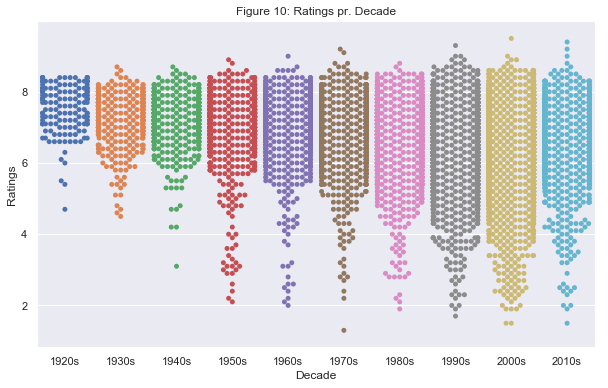

In [34]:
## NB: This peice of code takes a while to run!

# Swarm plot (Consider comparing decades) 
def swarm_plot(y="imdbRating"): 
    """ Creates a Swarm plot of y by decade
    
    Args:
    
        y (string): Variable on vertical axis. 
        
    Default: y = "imdbRating"
    Remember quotation marks around y. 
    
    """
    
    fig = plt.figure(figsize=(10,6))
    ax1 = fig.add_subplot(1,1,1)
    ax1 = sns.swarmplot(x = "decade", y = y, data=df)
    if y == "imdbRating": 
        ax1.set_title("Figure 10: Ratings pr. Decade")
        ax1.set_ylabel("Ratings")
    elif y == "nrOfWins": 
        ax1.set_title("Figure 10: Wins pr. Decade")
        ax1.set_ylabel("Nr. of Wins")
    elif y == "nrOfNominations": 
        ax1.set_title("Figure 10: Nominations pr. Decade")
        ax1.set_ylabel("Nr. of Nominations")
    elif y == "duration": 
        ax1.set_title("Figure 10: Duration pr. Decade")
        ax1.set_ylabel("Duration")
    else: 
        ax1.set_title(f"Figure 10: {y} pr. Decade")
        ax1.set_ylabel(y)
    ax1.set_xlabel("Decade")
    

swarm_plot()

From this swarm plot, we see that the diversity in ratings has growns across time. This is probably due to the fact, that the number of movies has been increasing since the 1920'. Though more movies are produced today, the quality is not necessarily as good anymore. However, there might be a bias, as people who watch and rate older movies on IMDB might really like these, and thus give them higher ratings. 

### Best and worst movies of each decade

This piece of code finds the original titles of the movies, by accesing the IMDb-webpage. This is done by using a library called "requests", and takes a little while to run, since it has to get titles for 100 movies.

In [13]:
# Defining a function to get original movie-titles
def find_orgnames():
    """ The dataset being used is german, e.g. some of the titles are in german. We wanted to fix this, by adding 
        the original movienames from IMDb. The original dataset has a variable tid which corresponds to the movie-id
        from the IMDb website. The function iterates over the id's for the top-movies of each decade, accesses the IMDb
        website, and gets the original movie title
        
        Args:
            None
        
        Return:
            Returns two lists:
                org_names which holds the original movie-titles
                id5_list which holds the id's for the movies.
            These are to be merged later.
        
        Notice:
            To access the IMDb webiste and get the names from the html-code, two packages are used: requests and BeautifulSoup.
            Further more, since the function demands some patience, a progress bar shows the progress of accessing the IMDb website.
            This needs the package pyprind, which has to be installed seperately. Alternatively remove this from the function."""

    # Condition on minimum number of ratings
    I = df['ratingCount'] >= 5000

    # Sort top and bottom movies by decade
    top = df[I].reset_index(drop=True)
    top = top.sort_values(['decade', 'imdbRating'], ascending=False)
    top5_decade = top.groupby('decade').head(5)
    bottom = df[I].reset_index(drop=True)
    bottom = bottom.sort_values(['decade', 'imdbRating'], ascending=True)
    bottom5_decade = bottom.groupby('decade').head(5)

    # Get IMDb id's
    top5_id = top5_decade.tid.tolist()
    bottom5_id = bottom5_decade.tid.tolist()
    id5_list = top5_id + bottom5_id 

    # Initiate list to get names from IMDb
    org_names = []

    # Get original names from IMDb using requests
    for i,id in enumerate(id5_list):
        test = requests.get('https://www.imdb.com/title/' + id)
        soup = bs(test.text,'html.parser')
        if soup.find('div',class_='originalTitle') != None:
            org_names.append(soup.find('div',class_='originalTitle').text)
        else:
            org_names.append(soup.find('h1').text)
        perc.update() # Remove if you don't want progressbar
            
    return (org_names, id5_list)

# For progressbar of getting movie titles
perc = pyprind.ProgPercent(100,monitor=True) # Remove if you don't want progressbar

print('Accessing IMDb for original names')
(org_names, id5_list) = find_orgnames()

Accessing IMDb for original names


[100 %] Time elapsed: 00:02:08 | ETA: 00:00:00
Total time elapsed: 00:02:08


In [16]:
# Function for creating list of top/bottom movies of each decade
def _top_bottom_list(org_names, id5_list, decade):
    """ Takes the original names found above, and generates list of top and bottom movies each decade.
    
        Args:
        org_names (list): List of original movie-titles
        id5_list (list): List of id's for org_names
        decade (str): Which decade is shown in the list
        
        Returns:
        A lists of top and bottom movies for chosen decade, with original name and rating"""
    
    # Merge original names with data
    df_merge_1 = pd.DataFrame(i for i in org_names) # Names
    df_merge_2 = pd.DataFrame(i for i in id5_list) # ID
    df_merge = df_merge_1.merge(df_merge_2, left_index=True, right_index=True) # Merge names and ID together
    df_merge = df_merge.rename(columns={'0_x': 'org_title', '0_y': 'tid'}) # Rename for data-merge

    text = ''

    # Merge with data
    top_bottom = df.merge(df_merge, how='inner', on='tid')
    top_bottom['org_title'] = top_bottom['org_title'].str.split('\(').str[0] # Remove info on years
    
    if decade != 'All time':
        I = top_bottom['decade'] == decade
        decade_top = top_bottom[I][['org_title','imdbRating','decade']].sort_values('imdbRating', ascending=False).reset_index(drop=True)
        decade_bottom = top_bottom[I][['org_title','imdbRating','decade']].sort_values('imdbRating', ascending=True).reset_index(drop=True)
        #grouped = top_bottom[['org_title','imdbRating','decade']].sort_values('imdbRating', ascending=False).reset_index(drop=True).groupby('decade')
    else:
        all_top = top_bottom[['org_title','imdbRating']].sort_values('imdbRating', ascending = False).reset_index(drop=True)
        all_bottom = top_bottom[['org_title','imdbRating']].sort_values('imdbRating', ascending = True).reset_index(drop=True)

    # Prints solution by finding list for each decade
    #for name, group in grouped:        
    #    elif name == decade:
    if decade != 'All time':
        text += '\n\n'
        text += f'The top 5 movies of the {decade} are: '
        top_name_list = decade_top.org_title.tolist()
        top_rating_list = decade_top.imdbRating.tolist()
        bottom_name_list = decade_bottom.org_title.tolist()
        bottom_rating_list = decade_bottom.imdbRating.tolist()
        for j,i in enumerate(top_name_list):
            if j < 5:
                text += '\n'
                text += f'{i:<40} with rating: {top_rating_list[j]}'
        text += '\n\n'
        text += f'The bottom 5 movies of the {decade} are:'
        for j,i in enumerate(bottom_name_list): 
            if j < 5:
                text += '\n'
                text += f'{i:<40} with rating: {bottom_rating_list[j]}' 
                
    else:
        text += '\n\n'
        text += f'The top 5 movies of the all time are: '
        top_name_list = all_top.org_title.tolist()
        top_rating_list = all_top.imdbRating.tolist()
        bottom_name_list = all_bottom.org_title.tolist()
        bottom_rating_list = all_bottom.imdbRating.tolist()
        for j,i in enumerate(top_name_list):
            if j < 5:
                text += '\n'
                text += f'{i:<40} with rating: {top_rating_list[j]}'
        text += '\n\n'
        text += f'The bottom 5 movies of the all time are:'
        
        for j,i in enumerate(bottom_name_list):
            if j < 5:
                text += '\n'
                text += f'{i:<40} with rating: {bottom_rating_list[j]}' 


    print(text)
    
# List decades for the widget
decades = list(df.decade.unique())
decades.append('All time')
    
def top_bottom_list():
    """ Interaction function which interacts with _top_bottom_list. 
        It activates one widgets, which selects which decade the top 5 and bottom 5 movies are shown for."""
    widgets.interact(_top_bottom_list,
            decade = widgets.Dropdown(
                options = decades,
                description = 'Decade',
                value = '2010s'),
            org_names = widgets.fixed(org_names),
            id5_list = widgets.fixed(id5_list));
        
top_bottom_list()

interactive(children=(Dropdown(description='Decade', index=9, options=('1920s', '1930s', '1940s', '1950s', '19…

The list kind of speaks for itself, though we see what is also implied by the swarmplot earlier: the earlier years holds movies with relatively high ratings. In the 1920's the lowest rated movie is "The Jazz Singer" with a rating of 6.9.

Looking through the decades, we see several well-known movies for

### What about the news?

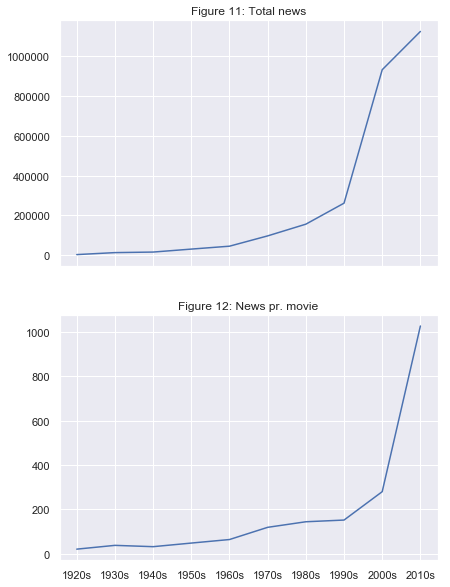

In [38]:
def news_pr_movie_fig():
    """ Sums the number of news and movies pr. decade, and calculates the number of news relative to the number of movies.
        Plots three figures: 
            1. Total number of news pr. decade
            2. News pr. movies pr. decade
        
        Args:
            None
            
        Returns:
            The two plots mentioned.
            """

    df['dummy'] = 1

    # Count number of news articles
    def total_news(x):
        d = x['nrOfNewsArticles'].sum()
        return pd.Series(d, index = ['Total number of news'])

    # Count number of movies
    def total_movies(x):
        d = x['dummy'].sum()
        return pd.Series(d, index = ['Total number of movies'])

    # Find news pr. movie
    def news_pr_movie(x):
        d = np.array(x['nrOfNewsArticles'].sum()/x['dummy'].sum())
        return pd.Series(d, index = ['news Pr Movie'])

    # Variables for plots
    x = df.groupby('decade').apply(total_news)
    z = df.groupby('decade').apply(news_pr_movie)

    # Start subplot
    f, (fig1,fig2) = plt.subplots(2,1,sharex=True)
    f.subplots_adjust(hspace=0.2,right=1,top=2)

    # Plot the data
    fig1.plot(x)
    fig1.set_title('Figure 11: Total news')
    fig2.plot(z)
    fig2.set_title('Figure 12: News pr. movie');

news_pr_movie_fig()

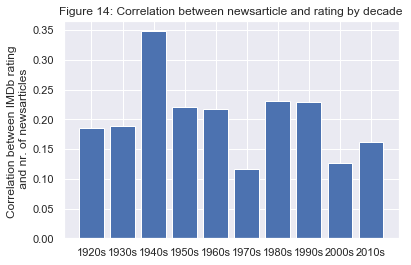

In [39]:
def corr_pr_decade():
    """ Calculates correlation between nr. of newsarticles and the IMDb-rating, for each decade.
    
        Args:
            None
            
        Returns:
            Histogram plot with correlations for each decade."""
    
    # Empty lists for plots
    decade_list = []
    corr_list = []
    
    # Iterates over each decade
    for i in df.decade.unique():
        
        # Saves temprorary dataframe for decade 
        I = df['decade'] == i
        df_temp = df[I]
        
        # Appends decade and correlation between rating and number of news articles to empty lists
        decade_list.append(i)
        corr_list.append(round(df_temp[['imdbRating','nrOfNewsArticles']].corr().iloc[0,1],3))
        
    # Plots correlations
    plt.bar(decade_list,corr_list)
    plt.ylabel('Correlation between IMDb rating \n and nr. of newsarticles')
    plt.title('Figure 14: Correlation between newsarticle and rating by decade')
    
corr_pr_decade()

![ChessUrl](https://media.giphy.com/media/FlYgLKL0RuKli/giphy.gif "Bingo")